# CRISP-DM

**CRISP-DM (Cross-Industry Standard Process for Data Mining)** is a widely used methodology for managing and executing data science projects. It provides a structured, phased approach that guides the development of predictive models and data analysis. CRISP-DM is divided into six phases, each representing a critical step in the data science lifecycle:

1. **Business Understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Modeling**
5. **Evaluation**
6. **Deployment**

## 1. Business Understanding

In this phase, the primary goal is to establish a clear connection between the data science problem and the business objectives.

**Objective:** Predict whether an individual's income is above or below $50,000 using their demographical, educational, and employment data. This has value to different institutions like government or private organizations in planning and targetted marketing of their products, services, and offerings, ultimately driving decisions through data-informed insights. Moreover, we want to identify different features which have a greater impact on an individual's income.

**Project Goals:** Using the [Adult Income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset), we want to create a model that classifies individuals accurately, with at least 85% accuracy. For this, we will be using different ML Classification algorithms and models to observe their performance against our data.

## 2. Data Understanding

The purpose of this phase is to become familiar with the data, assess its quality, and identify potential patterns or relationships that could influence modeling.

Firstly, we need to import all libraries and dataset for this project.

In [ ]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import joblib

In [ ]:
# Uploading kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Accessing dataset from kaggle directly
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d wenruliu/adult-income-dataset

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 110MB/s]


In [ ]:
# Extracting the csv
!unzip adult-income-dataset.zip
!rm -rf adult-income-dataset.zip

Archive:  adult-income-dataset.zip
  inflating: adult.csv               


In [ ]:
# Loading the dataset into a dataframe
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


With the dataset loaded into the dataframe, we can now begin Exploratory Data Analysis (EDA) on it. First, we will observe the basic structure of the dataset.

In [ ]:
# Get some basic info on all columns in the df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [ ]:
# Get some statistical info on the numerical columns
print(df.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


The next step is to observe any missing values in the columns.

In [ ]:
# Get number of rows with null values in each column
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


While it does seem like there is no missing data in this dataframe, we can see some values as '?' in columns, which designate missing values. Instead, we will now replace them with NaN and check again.

In [ ]:
# Replace all values having '?' with NaN to handle missing data
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


As we can see now, there are rows missing values in workclass, occupation, and native-countr columns. This is something we can address in the Data Preparation phase through various data cleaning methods.

With missing values noted, we can now focus on visualization to understand our data better by creating histograms, bar graphs, correlation matrix, and more.

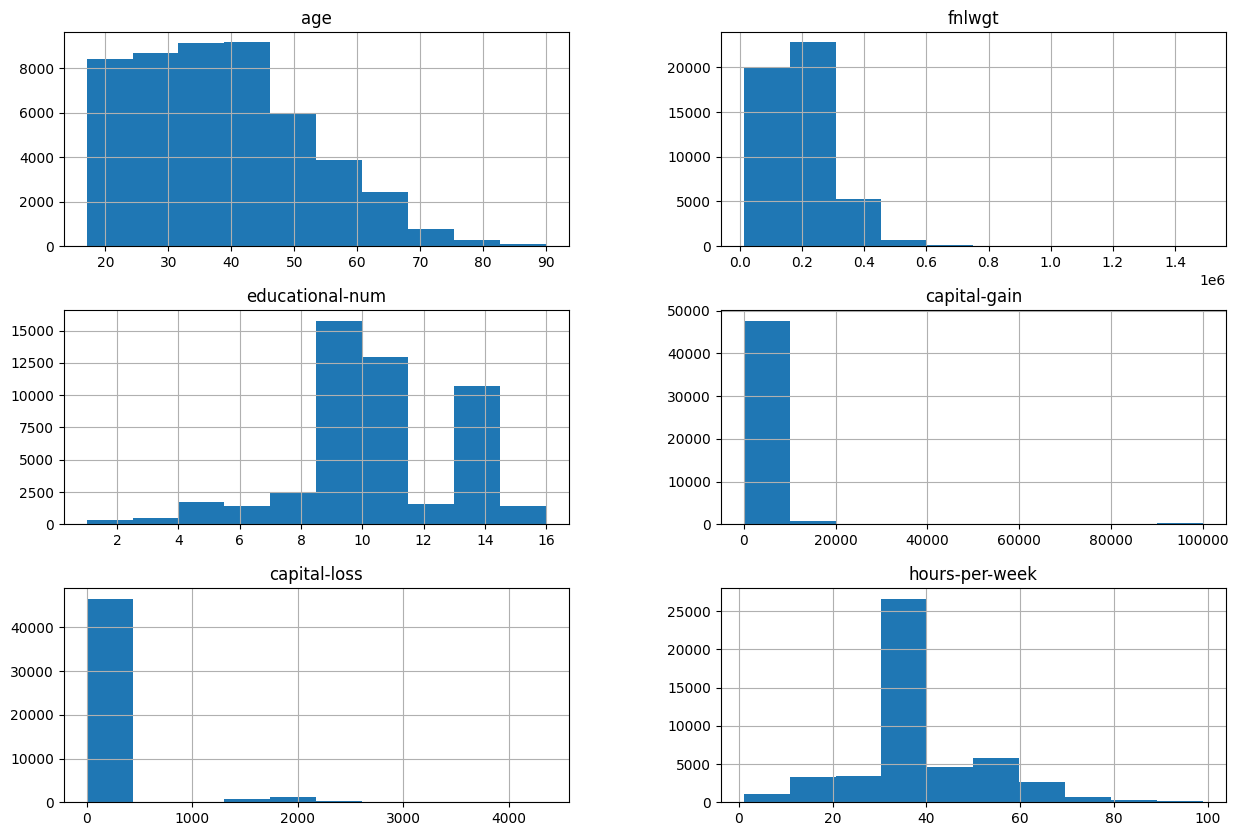

In [ ]:
# Numerical columns histogram
df.hist(bins=10, figsize=(15, 10))
plt.show()

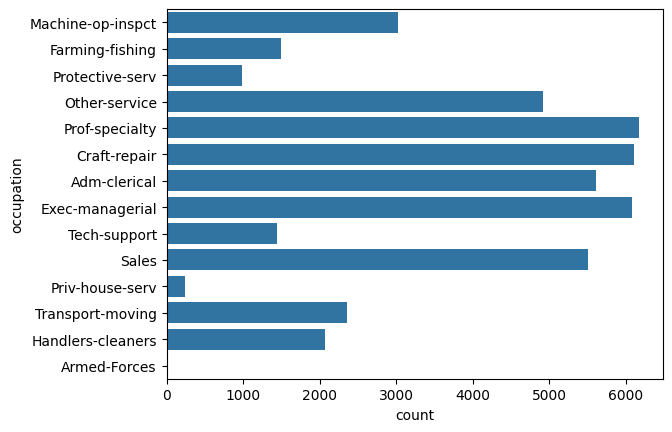

In [ ]:
# Occupation histogram
sns.countplot(y='occupation', data=df)
plt.show()

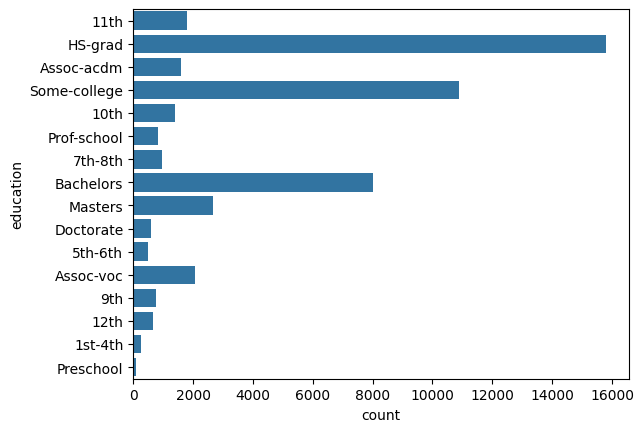

In [ ]:
# Education histogram
sns.countplot(y='education', data=df)
plt.show()

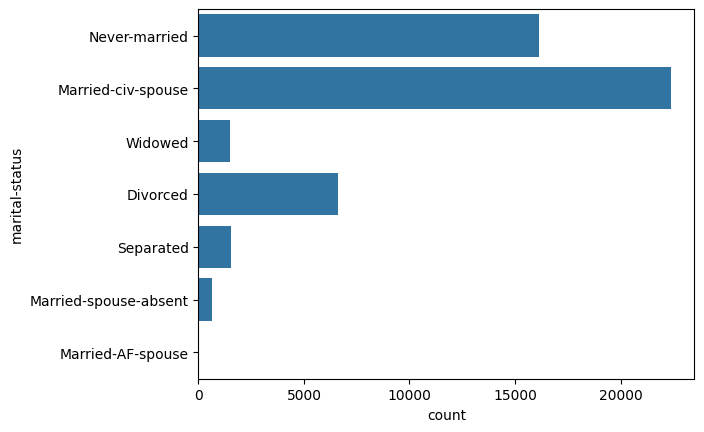

In [ ]:
# Marital status histogram
sns.countplot(y='marital-status', data=df)
plt.show()

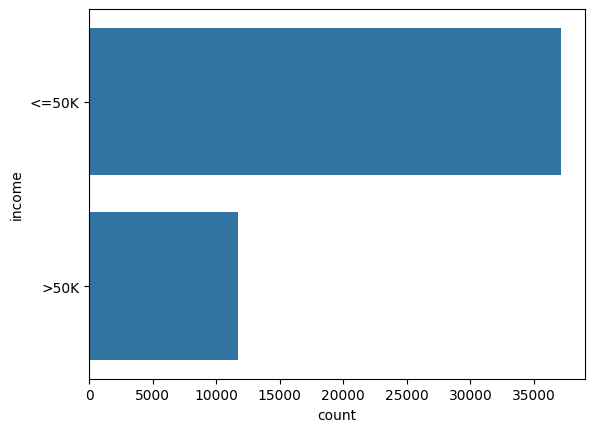

In [ ]:
# Income histogram
sns.countplot(df['income'])
plt.show()

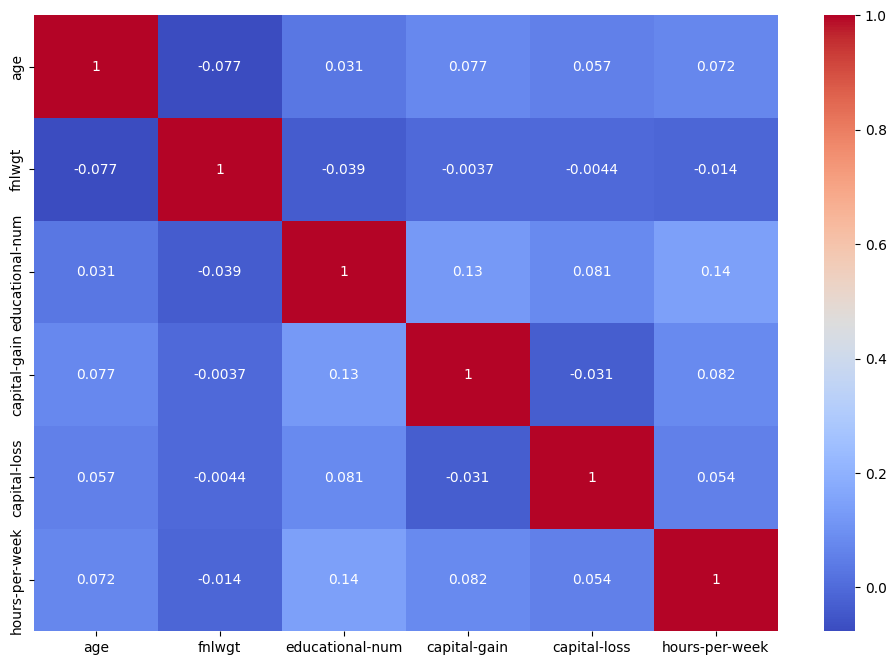

In [ ]:
# Correlation matrix
df_numerical = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

Since the correlation values are very small, it can be inferred that there are no strong linear relationships between the numerical columns.

## 3. Data Preparation

In this phase, the goal is to clean, transform, and structure the data to make it suitable for modeling.

First, we will handle all the missing values from the categorical columns to replace them with their respective mode values (most frequently occuring value). This way, we do not have to drop the columns and lose data.

In [ ]:
# Handle missing columns
missing_columns = ['workclass', 'occupation', 'native-country']

for column in missing_columns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

In [ ]:
# Verify if it is handled
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


As we can see, all missing values have been handled using data cleaning methods. Now, we will convert categorical columns into numerical format to obtain a more appropriate dataset for modeling. Each column has a different inherent value, so we will use different methods for them.

In [ ]:
# One-hot encoding for workclass, marital-status, relationship, and race columns

df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'relationship', 'race'])
df.head()

,age,fnlwgt,education,educational-num,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,11th,7,Machine-op-inspct,Male,0,0,40,United-States,...,False,False,True,False,False,False,False,True,False,False
1,38,89814,HS-grad,9,Farming-fishing,Male,0,0,50,United-States,...,False,False,False,False,False,False,False,False,False,True
2,28,336951,Assoc-acdm,12,Protective-serv,Male,0,0,40,United-States,...,False,False,False,False,False,False,False,False,False,True
3,44,160323,Some-college,10,Machine-op-inspct,Male,7688,0,40,United-States,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,Some-college,10,Prof-specialty,Female,0,0,30,United-States,...,False,False,True,False,False,False,False,False,False,True


For remaining columns, we will apply different techniques.

*   gender - binary encoding
*   education - ordinal encoding
*   occupation - target encoding
*   native-country - frequency encoding


In [ ]:
# Different encoding for other columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                   '10th', '11th', '12th', 'HS-grad', 'Some-college',
                   'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ord_enc = OrdinalEncoder(categories=[education_order])
df['education'] = ord_enc.fit_transform(df[['education']])

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

mean_income = df.groupby('occupation')['income'].mean()
df['occupation_encoded'] = df['occupation'].map(mean_income)
df.drop('occupation', axis=1, inplace=True)

freq_encoding = df['native-country'].value_counts(normalize=True)
df['native-country'] = df['native-country'].map(freq_encoding)

df.head()

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,occupation_encoded
0,25,226802,6.0,7,1,0,0,40,0.914971,0,...,False,True,False,False,False,False,True,False,False,0.123097
1,38,89814,8.0,9,1,0,0,50,0.914971,0,...,False,False,False,False,False,False,False,False,True,0.116107
2,28,336951,10.0,12,1,0,0,40,0.914971,1,...,False,False,False,False,False,False,False,False,True,0.313327
3,44,160323,9.0,10,1,7688,0,40,0.914971,1,...,False,False,False,False,False,False,True,False,False,0.123097
4,18,103497,9.0,10,0,0,0,30,0.914971,0,...,False,True,False,False,False,False,False,False,True,0.339494


In [ ]:
# Verify all column types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   48842 non-null  int64  
 1   fnlwgt                                48842 non-null  int64  
 2   education                             48842 non-null  float64
 3   educational-num                       48842 non-null  int64  
 4   gender                                48842 non-null  int64  
 5   capital-gain                          48842 non-null  int64  
 6   capital-loss                          48842 non-null  int64  
 7   hours-per-week                        48842 non-null  int64  
 8   native-country                        48842 non-null  float64
 9   income                                48842 non-null  int64  
 10  workclass_Federal-gov                 48842 non-null  bool   
 11  workclass_Local

With all columns turned to numerical, we can now extract the target variable and normalize the remaining dataset.

In [ ]:
# Normalize the data
X = df.drop('income', axis=1)
y = df['income']

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_normalized.head()

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,occupation_encoded
0,0.109589,0.145129,0.400000,0.400000,1.0,0.000000,0.0,0.397959,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.237850
1,0.287671,0.052451,0.533333,0.533333,1.0,0.000000,0.0,0.500000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.222832
2,0.150685,0.219649,0.666667,0.733333,1.0,0.000000,0.0,0.397959,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.646575
3,0.369863,0.100153,0.600000,0.600000,1.0,0.076881,0.0,0.397959,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.237850
4,0.013699,0.061708,0.600000,0.600000,0.0,0.000000,0.0,0.295918,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.702799


Finally, we will split the dataset into training and testing dataframes for the modeling phase.

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39073, 36)
(9769, 36)
(39073,)
(9769,)


## 4. Modeling

In this phase, we'll apply machine learning algorithms to create predictive models and evaluate their performance.

For this classification task, we will use the following models for training on our data, and compare their performance to select the best one for our problem.
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting (XGBoost)
5. Support Vector Machine (SVM)

In [ ]:
# List of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Support Vector Machine (SVM)": SVC()
}

# Training and evaluating models
for model_name, model in models.items():
    # Fit model on training data
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.83
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7479
           1       0.69      0.48      0.56      2290

    accuracy                           0.83      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.83      0.81      9769


Decision Tree Accuracy: 0.82
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7479
           1       0.61      0.63      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769


Random Forest Accuracy: 0.86
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7479
           1       0.74  

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:45:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting (XGBoost) Accuracy: 0.88
Gradient Boosting (XGBoost) Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.77      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769


Support Vector Machine (SVM) Accuracy: 0.80
Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      7479
           1       0.96      0.17      0.29      2290

    accuracy                           0.80      9769
   macro avg       0.88      0.58      0.59      9769
weighted avg       0.83      0.80      0.75      9769




As we can observe over various metrics, we got the best accuracy from Gradient Boosting (XGBoost) model. Based on our initial metrics defined, this will be our choice. It also shows good performance over precision, recall, and F1-score metrics.

## 5. Evaluation

The goal of this phase is to ensure that the model aligns with the original business objectives and performs well under realistic conditions.

We will summarize the metrics for the selected model, and do cross-validation. Finally, we will also plot the ROC-AUC curve.

In [ ]:
# Evaluate model against various metrics
best = models["Gradient Boosting (XGBoost)"]
y_pred = best.predict(X_test)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred, average='weighted'),
}

# Create a DataFrame to display the results
metrics_df = pd.DataFrame([metrics])

# Show the metrics summary
print(metrics_df)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

   Accuracy  Precision    Recall  F1 Score
0  0.876855   0.872893  0.876855  0.873807

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.77      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769


Confusion Matrix:
 [[7025  454]
 [ 749 1541]]


In [ ]:
# Cross-validation
cv_scores = cross_val_score(best, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy: 0.87


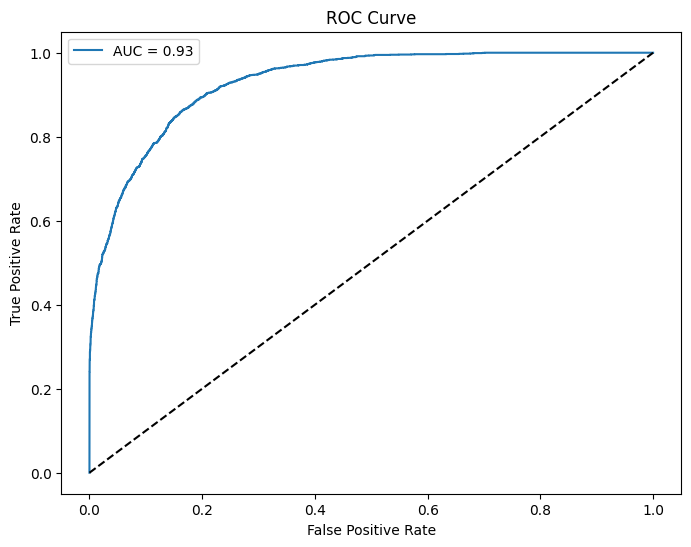

In [ ]:
y_prob = best.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

We can confidently say that our model meets the success criteria defined in the first phase, and hence is ready for deployment.

## 6. Deployment

The goal of this phase is to make the model available for use in a real-world environment, integrating it into business processes for decision-making.

As we are working within the colab for now, we can just save the model for future purposes.

In [ ]:
# Save the model
joblib.dump(best, 'model.pkl')